# Data Wrangling and EDA

## Imports

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load Data

### Tesla

In [80]:
tsla = yf.Ticker("TSLA").history(period = "10y")

### Correlated Stocks

NIO Inc.

In [81]:
nio = yf.Ticker("NIO").history(period = "10y")

Rivian

In [82]:
rivn = yf.Ticker("RIVN").history(period = "5y")

Lucid Motors

In [83]:
lcid = yf.Ticker("LCID").history(period = "5y")

Ford

In [84]:
f = yf.Ticker("F").history(period = "10y")

General Motors

In [85]:
gm = yf.Ticker("GM").history(period = "10y")

### Economic indicators

Interest Rate
[FRED](https://fred.stlouisfed.org/series/REAINTRATREARAT10Y)

In [86]:
interest_rate = pd.read_csv("../data/raw/interest_rate.csv")
interest_rate = interest_rate.set_index("DATE")

Consumer Confidence
[investing.com](https://www.investing.com/economic-calendar/cb-consumer-confidence-48)

In [87]:
cci = pd.read_excel("../data/raw/consumer confidence.xlsx")
cci = cci.set_index("date")

In [88]:
cci.head()

,Release Date,Time,Actual,Forecast,Previous
date,,,,,
2024-08-01,"Aug 27, 2024 (Aug)",10:00:00,103.3,100.9,101.9
2024-07-01,"Jul 30, 2024 (Jul)",10:00:00,100.3,99.7,97.8
2024-06-01,"Jun 25, 2024 (Jun)",10:00:00,100.4,100.0,101.3
2024-05-01,"May 28, 2024 (May)",10:00:00,102.0,96.0,97.5
2024-04-01,"Apr 30, 2024 (Apr)",10:00:00,97.0,104.0,103.1


Oil Price [macrotrends](https://www.macrotrends.net/1369/crude-oil-price-history-chart)

In [125]:
oil_prices = pd.read_csv("../data/raw/oil_prices.csv", header = [7])
oil_prices = oil_prices.set_index("date")

Median Consumer Price Index [FRED](https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE)

In [90]:
cpi = pd.read_csv("../data/raw/cpi.csv")
cpi = cpi.set_index("DATE")

## Exploring each Time Series

### Tesla

In [91]:
tsla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-08 00:00:00-04:00,18.507999,18.992001,18.501333,18.807333,82524000,0.0,0.0
2014-09-09 00:00:00-04:00,18.865999,19.032667,18.466667,18.565332,68382000,0.0,0.0
2014-09-10 00:00:00-04:00,18.633333,18.760668,18.243999,18.740000,56719500,0.0,0.0
2014-09-11 00:00:00-04:00,18.697332,18.986000,18.575333,18.687332,56491500,0.0,0.0
2014-09-12 00:00:00-04:00,18.700001,18.826000,18.466667,18.613333,49869000,0.0,0.0


We have 4 possible options of prices to forecast: Open, High, Low and Close.  
The closing price is the final price at which the stock trades during regular market hours and is often considered the most important price of the day.

In [92]:
tsla.index

DatetimeIndex(['2014-09-08 00:00:00-04:00', '2014-09-09 00:00:00-04:00',
               '2014-09-10 00:00:00-04:00', '2014-09-11 00:00:00-04:00',
               '2014-09-12 00:00:00-04:00', '2014-09-15 00:00:00-04:00',
               '2014-09-16 00:00:00-04:00', '2014-09-17 00:00:00-04:00',
               '2014-09-18 00:00:00-04:00', '2014-09-19 00:00:00-04:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for Tesla.

### Nio

In [93]:
nio.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0


In [94]:
nio.index

DatetimeIndex(['2018-09-12 00:00:00-04:00', '2018-09-13 00:00:00-04:00',
               '2018-09-14 00:00:00-04:00', '2018-09-17 00:00:00-04:00',
               '2018-09-18 00:00:00-04:00', '2018-09-19 00:00:00-04:00',
               '2018-09-20 00:00:00-04:00', '2018-09-21 00:00:00-04:00',
               '2018-09-24 00:00:00-04:00', '2018-09-25 00:00:00-04:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1506, freq=None)

We have data since 12/09/2018 for Nio.

### Rivian

In [95]:
rivn.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-10 00:00:00-05:00,106.750000,119.459999,95.199997,100.730003,103679500,0.0,0.0
2021-11-11 00:00:00-05:00,114.625000,125.000000,108.010002,122.989998,83668200,0.0,0.0
2021-11-12 00:00:00-05:00,128.645004,135.199997,125.250000,129.949997,50636800,0.0,0.0
2021-11-15 00:00:00-05:00,130.800003,152.529999,127.510002,149.360001,64982300,0.0,0.0
2021-11-16 00:00:00-05:00,163.800003,179.470001,153.779999,172.009995,94036600,0.0,0.0


In [96]:
rivn.index

DatetimeIndex(['2021-11-10 00:00:00-05:00', '2021-11-11 00:00:00-05:00',
               '2021-11-12 00:00:00-05:00', '2021-11-15 00:00:00-05:00',
               '2021-11-16 00:00:00-05:00', '2021-11-17 00:00:00-05:00',
               '2021-11-18 00:00:00-05:00', '2021-11-19 00:00:00-05:00',
               '2021-11-22 00:00:00-05:00', '2021-11-23 00:00:00-05:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=709, freq=None)

We have data since 10/11/2021 for Rivian.

### Lucid Motors

In [97]:
lcid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-18 00:00:00-04:00,10.25,10.250,9.82,9.89,564300,0.0,0.0
2020-09-21 00:00:00-04:00,9.90,9.960,9.86,9.86,762800,0.0,0.0
2020-09-22 00:00:00-04:00,9.96,9.960,9.85,9.88,1280800,0.0,0.0
2020-09-23 00:00:00-04:00,9.90,9.905,9.79,9.85,192600,0.0,0.0
2020-09-24 00:00:00-04:00,9.85,9.850,9.75,9.77,605500,0.0,0.0


In [98]:
lcid.index

DatetimeIndex(['2020-09-18 00:00:00-04:00', '2020-09-21 00:00:00-04:00',
               '2020-09-22 00:00:00-04:00', '2020-09-23 00:00:00-04:00',
               '2020-09-24 00:00:00-04:00', '2020-09-25 00:00:00-04:00',
               '2020-09-28 00:00:00-04:00', '2020-09-29 00:00:00-04:00',
               '2020-09-30 00:00:00-04:00', '2020-10-01 00:00:00-04:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=998, freq=None)

We have data since 18/09/2020 for Lucid Motors.

### Ford

In [99]:
f.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-08 00:00:00-04:00,10.029552,10.107441,10.011578,10.065500,47565300,0.0,0.0
2014-09-09 00:00:00-04:00,10.059508,10.077481,9.939680,9.963645,26656600,0.0,0.0
2014-09-10 00:00:00-04:00,9.975628,10.017567,9.951663,9.963645,16644400,0.0,0.0
2014-09-11 00:00:00-04:00,9.939682,9.987613,9.891751,9.981622,14658900,0.0,0.0
2014-09-12 00:00:00-04:00,9.969635,9.993601,9.885756,9.939678,16470100,0.0,0.0


In [100]:
f.index

DatetimeIndex(['2014-09-08 00:00:00-04:00', '2014-09-09 00:00:00-04:00',
               '2014-09-10 00:00:00-04:00', '2014-09-11 00:00:00-04:00',
               '2014-09-12 00:00:00-04:00', '2014-09-15 00:00:00-04:00',
               '2014-09-16 00:00:00-04:00', '2014-09-17 00:00:00-04:00',
               '2014-09-18 00:00:00-04:00', '2014-09-19 00:00:00-04:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for Ford.

### General Motors

In [101]:
gm.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-08 00:00:00-04:00,26.370295,26.463287,25.688373,25.758116,22120600,0.3,0.0
2014-09-09 00:00:00-04:00,25.727119,25.804609,25.579883,25.626379,11861000,0.0,0.0
2014-09-10 00:00:00-04:00,25.665125,25.835607,25.618632,25.796862,10471000,0.0,0.0
2014-09-11 00:00:00-04:00,25.696119,26.114573,25.688371,26.044830,10120400,0.0,0.0
2014-09-12 00:00:00-04:00,25.944097,26.037086,25.649630,25.781366,11036200,0.0,0.0


In [102]:
gm.index

DatetimeIndex(['2014-09-08 00:00:00-04:00', '2014-09-09 00:00:00-04:00',
               '2014-09-10 00:00:00-04:00', '2014-09-11 00:00:00-04:00',
               '2014-09-12 00:00:00-04:00', '2014-09-15 00:00:00-04:00',
               '2014-09-16 00:00:00-04:00', '2014-09-17 00:00:00-04:00',
               '2014-09-18 00:00:00-04:00', '2014-09-19 00:00:00-04:00',
               ...
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for General Motors.

### Interest Rate

In [103]:
interest_rate.head()

,REAINTRATREARAT10Y
DATE,
1982-01-01,7.623742
1982-02-01,7.656648
1982-03-01,7.128993
1982-04-01,7.408347
1982-05-01,7.320041


In [104]:
interest_rate.index

Index(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01', '1982-05-01',
       '1982-06-01', '1982-07-01', '1982-08-01', '1982-09-01', '1982-10-01',
       ...
       '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
       '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01'],
      dtype='object', name='DATE', length=512)

We have monthly data since 01/1982 for interest rate.

In [105]:
# Convert the index to datetime format
interest_rate.index = pd.to_datetime(interest_rate.index, format = "%Y-%m-%d")

In [106]:
# reindex
full_dates = pd.date_range(start = min(interest_rate.index), end = "08/31/2024")
interest_rate = interest_rate.reindex(full_dates)

In [113]:
# Resample the time series to daily frequency, filling missing days with forward fill
interest_rate_daily = interest_rate.ffill()

In [114]:
# Rename the index
interest_rate_daily = interest_rate_daily.rename_axis("Date")

### CCI

In [116]:
cci.head()

,Release Date,Time,Actual,Forecast,Previous
date,,,,,
2024-08-01,"Aug 27, 2024 (Aug)",10:00:00,103.3,100.9,101.9
2024-07-01,"Jul 30, 2024 (Jul)",10:00:00,100.3,99.7,97.8
2024-06-01,"Jun 25, 2024 (Jun)",10:00:00,100.4,100.0,101.3
2024-05-01,"May 28, 2024 (May)",10:00:00,102.0,96.0,97.5
2024-04-01,"Apr 30, 2024 (Apr)",10:00:00,97.0,104.0,103.1


In [117]:
cci.index

DatetimeIndex(['2024-08-01', '2024-07-01', '2024-06-01', '2024-05-01',
               '2024-04-01', '2024-03-01', '2024-02-01', '2024-01-01',
               '2023-12-01', '2023-11-01', '2023-10-01', '2023-09-01',
               '2023-08-01', '2023-07-01', '2023-06-01', '2023-05-01',
               '2023-04-01', '2023-03-01', '2023-02-01', '2023-01-01',
               '2022-12-01', '2022-11-01', '2022-10-01', '2022-09-01',
               '2022-08-01', '2022-07-01', '2022-06-01', '2022-05-01',
               '2022-04-01', '2022-03-01', '2022-02-01', '2022-01-01',
               '2021-12-01', '2021-11-01', '2021-10-01', '2021-09-01',
               '2021-08-01', '2021-07-01', '2021-06-01', '2021-05-01',
               '2021-04-01', '2021-03-01', '2021-02-01', '2021-01-01',
               '2020-12-01', '2020-11-01', '2020-10-01', '2020-09-01',
               '2020-08-01', '2020-07-01', '2020-06-01', '2020-05-01',
               '2020-04-01', '2020-03-01'],
              dtype='datetime64[n

We have monthly data since 03/2020 for CCI.

In [118]:
# reindex
full_dates = pd.date_range(start = min(cci.index), end = "08/31/2024")
cci = cci.reindex(full_dates)

In [119]:
# Resample the time series to daily frequency, filling missing days with forward fill
cci_daily = cci.ffill()

In [120]:
# Rename the index
cci_daily = cci_daily.rename_axis("Date")

In [121]:
cci_daily = cci_daily[["Actual"]]

In [122]:
cci_daily.head()

,Actual
Date,
2020-03-01,120.0
2020-03-02,120.0
2020-03-03,120.0
2020-03-04,120.0
2020-03-05,120.0


### Oil Prices

In [126]:
oil_prices.head()

,value
date,
2011-08-19,82.33
2011-08-22,84.42
2011-08-23,85.35
2011-08-24,84.99
2011-08-25,85.15


In [127]:
oil_prices.index

Index(['2011-08-19', '2011-08-22', '2011-08-23', '2011-08-24', '2011-08-25',
       '2011-08-26', '2011-08-29', '2011-08-30', '2011-08-31', '2011-09-01',
       ...
       '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26',
       '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-02'],
      dtype='object', name='date', length=3307)

We have daily data since 19/08/2011 for Oil Price

In [128]:
# Convert the index to datetime format
oil_prices.index = pd.to_datetime(oil_prices.index)

In [129]:
# There are NA values
oil_prices = oil_prices.dropna()

# Forward fill
full_date_range = pd.date_range(start=oil_prices.index.min(), end=oil_prices.index.max(), freq='D')
oil_prices_full = oil_prices.reindex(full_date_range)
oil_prices_filled = oil_prices_full.ffill()

In [130]:
# Rename the index
oil_prices_filled = oil_prices_filled.rename_axis("Date")

### Inflation Rate

In [133]:
cpi.head()

,MEDCPIM158SFRBCLE
DATE,
1983-01-01,5.014653
1983-02-01,4.952545
1983-03-01,3.612261
1983-04-01,4.828054
1983-05-01,3.767326


In [134]:
cpi.index

Index(['1983-01-01', '1983-02-01', '1983-03-01', '1983-04-01', '1983-05-01',
       '1983-06-01', '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
       ...
       '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
       '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01'],
      dtype='object', name='DATE', length=500)

We have monthly data since 01/1983 for CPI.

In [135]:
# Convert the index to datetime format
cpi.index = pd.to_datetime(cpi.index)

In [136]:
# reindex
full_dates = pd.date_range(start = min(cpi.index), end = "08/31/2024")
cpi = cpi.reindex(full_dates)

In [137]:
# Resample the time series to daily frequency, filling missing days with forward fill
cpi_daily = cpi.ffill()

In [138]:
# Rename the index
cpi_daily = cpi_daily.rename_axis("Date")

## Alligning all time series

Check for time series with less data

In [140]:
stocks_list = [tsla, nio, rivn, lcid, f, gm]
indicators_list =[interest_rate_daily, cci_daily, oil_prices_filled, cpi_daily]

### Lower Limit

In [141]:
for stock in stocks_list:
    print(min(stock.index))

2014-09-08 00:00:00-04:00
2018-09-12 00:00:00-04:00
2021-11-10 00:00:00-05:00
2020-09-18 00:00:00-04:00
2014-09-08 00:00:00-04:00
2014-09-08 00:00:00-04:00


In [142]:
for indicator in indicators_list:
    print(min(indicator.index))

1982-01-01 00:00:00
2020-03-01 00:00:00
2011-08-19 00:00:00
1983-01-01 00:00:00


The lower limit is 10/11/2021

### Upper Limit

In [143]:
for stock in stocks_list:
    print(max(stock.index))

2024-09-06 00:00:00-04:00
2024-09-06 00:00:00-04:00
2024-09-06 00:00:00-04:00
2024-09-06 00:00:00-04:00
2024-09-06 00:00:00-04:00
2024-09-06 00:00:00-04:00


In [144]:
for indicator in indicators_list:
    print(max(indicator.index))

2024-08-31 00:00:00
2024-08-31 00:00:00
2024-09-02 00:00:00
2024-08-31 00:00:00


The upper limit is 31/08/2024

### Slicing all time series to allign their dates

In [145]:
tesla_alligned = tsla.Close.loc["11/10/2021":"08/31/2024"].rename("Tesla")
nio_alligned = nio.Close.loc["11/10/2021":"08/31/2024"].rename("Nio")
rivian_alligned = rivn.Close.loc["11/10/2021":"08/31/2024"].rename("Rivian")
lucid_alligned = lcid.Close.loc["11/10/2021":"08/31/2024"].rename("Lucid")
ford_alligned = f.Close.loc["11/10/2021":"08/31/2024"].rename("Ford")
gm_alligned = gm.Close.loc["11/10/2021":"08/31/2024"].rename("General Motors")

In [147]:
interest_rate_alligned = interest_rate_daily.REAINTRATREARAT10Y.loc["11/10/2021":"08/31/2024"].rename("Interest Rate")
cci_alligned = cci_daily.Actual.loc["11/10/2021":"08/31/2024"].rename("CCI")
oil_prices_alligned = oil_prices_filled[" value"].loc["11/10/2021":"08/31/2024"].rename("Oil Prices")
cpi_alligned = cpi_daily.MEDCPIM158SFRBCLE.loc["11/10/2021":"08/31/2024"].rename("CPI")

Filter weekends in indicators series

In [148]:
interest_rate_alligned = interest_rate_alligned[interest_rate_alligned.index.weekday < 5]
cci_alligned = cci_alligned[cci_alligned.index.weekday < 5]
oil_prices_alligned = oil_prices_alligned[oil_prices_alligned.index.weekday < 5]
cpi_alligned = cpi_alligned[cpi_alligned.index.weekday < 5]

Drop timezone

In [149]:
tesla_alligned = pd.Series(tesla_alligned.values, index = pd.to_datetime(tesla_alligned.index.date))
nio_alligned = pd.Series(nio_alligned.values, index = pd.to_datetime(nio_alligned.index.date))
rivian_alligned = pd.Series(rivian_alligned.values, index = pd.to_datetime(rivian_alligned.index.date))
lucid_alligned = pd.Series(lucid_alligned.values, index = pd.to_datetime(lucid_alligned.index.date))
ford_alligned = pd.Series(ford_alligned.values, index = pd.to_datetime(ford_alligned.index.date))
gm_alligned = pd.Series(gm_alligned.values, index = pd.to_datetime(gm_alligned.index.date))

## Verify that all time series have all data points

In [150]:
print(len(tesla_alligned))
print(len(nio_alligned))
print(len(rivian_alligned))
print(len(lucid_alligned))
print(len(ford_alligned))
print(len(gm_alligned))
print(len(interest_rate_alligned))
print(len(cci_alligned))
print(len(oil_prices_alligned))
print(len(cpi_alligned))

705
705
705
705
705
705
733
733
733
733


Identify the difference

In [151]:
set(interest_rate_alligned.index).difference(set(tesla_alligned.index))

{Timestamp('2021-11-25 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2022-01-17 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-05-30 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-09-05 00:00:00'),
 Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-12-26 00:00:00'),
 Timestamp('2023-01-02 00:00:00'),
 Timestamp('2023-01-16 00:00:00'),
 Timestamp('2023-02-20 00:00:00'),
 Timestamp('2023-04-07 00:00:00'),
 Timestamp('2023-05-29 00:00:00'),
 Timestamp('2023-06-19 00:00:00'),
 Timestamp('2023-07-04 00:00:00'),
 Timestamp('2023-09-04 00:00:00'),
 Timestamp('2023-11-23 00:00:00'),
 Timestamp('2023-12-25 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-01-15 00:00:00'),
 Timestamp('2024-02-19 00:00:00'),
 Timestamp('2024-03-29 00:00:00'),
 Timestamp('2024-05-27 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-04 00:00:00')}

Alligning economic indicators index

In [152]:
interest_rate_alligned = interest_rate_alligned.loc[tesla_alligned.index]
cci_alligned = cci_alligned.loc[tesla_alligned.index]
oil_prices_alligned = oil_prices_alligned.loc[tesla_alligned.index]
cpi_alligned = cpi_alligned.loc[tesla_alligned.index]

In [153]:
print(len(tesla_alligned))
print(len(nio_alligned))
print(len(rivian_alligned))
print(len(lucid_alligned))
print(len(ford_alligned))
print(len(gm_alligned))
print(len(interest_rate_alligned))
print(len(cci_alligned))
print(len(oil_prices_alligned))
print(len(cpi_alligned))

705
705
705
705
705
705
705
705
705
705


## Plot Time Series

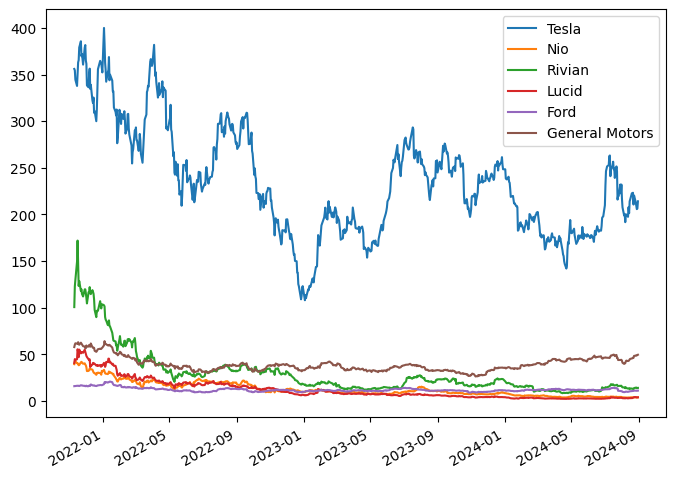

In [154]:
ax, fig = plt.subplots(figsize = (8, 6))

tesla_alligned.plot()
nio_alligned.plot()
rivian_alligned.plot()
lucid_alligned.plot()
ford_alligned.plot()
gm_alligned.plot()

plt.legend(labels = ["Tesla", "Nio", "Rivian", "Lucid", "Ford", "General Motors"])
plt.show()

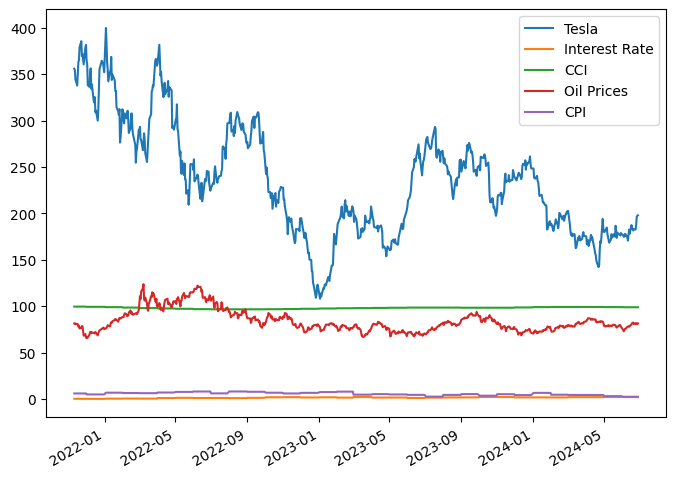

In [167]:
ax, fig = plt.subplots(figsize = (8, 6))

tesla_alligned.plot()
interest_rate_alligned.plot()
cci_alligned.plot()
oil_prices_alligned.plot()
cpi_alligned.plot()

plt.legend(labels = ["Tesla", "Interest Rate", "CCI", "Oil Prices", "CPI"])
plt.show()

Closer look to CCI, CPI and Interest Rate

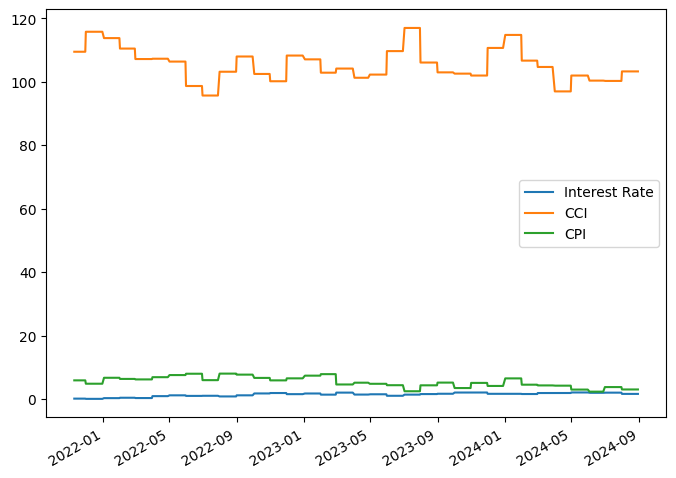

In [155]:
ax, fig = plt.subplots(figsize = (8, 6))

interest_rate_alligned.plot()
cci_alligned.plot()
cpi_alligned.plot()

plt.legend(labels = ["Interest Rate", "CCI", "CPI"])
plt.show()

## Decomposing the Time Series

In [156]:
def plot_ts_components(ts):
    ts_decompose = seasonal_decompose(ts, model = "additive", period = 250)
    ts_decompose.plot()
    plt.show()

In [157]:
tesla_alligned.name = "Tesla"
nio_alligned.name = "Nio"
rivian_alligned.name = "Rivian"
lucid_alligned.name = "Lucid Motors"
ford_alligned.name = "Ford"
gm_alligned.name = "General Motors"

In [158]:
stocks = [tesla_alligned, nio_alligned, rivian_alligned, lucid_alligned, ford_alligned, gm_alligned]
economic_ind = [interest_rate_alligned, cci_alligned, oil_prices_alligned, cpi_alligned]

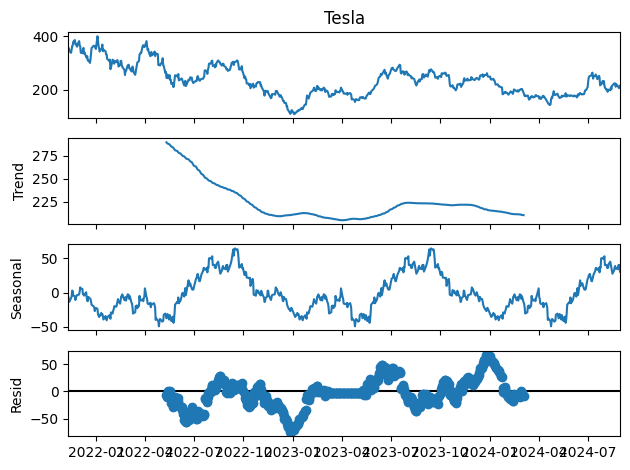

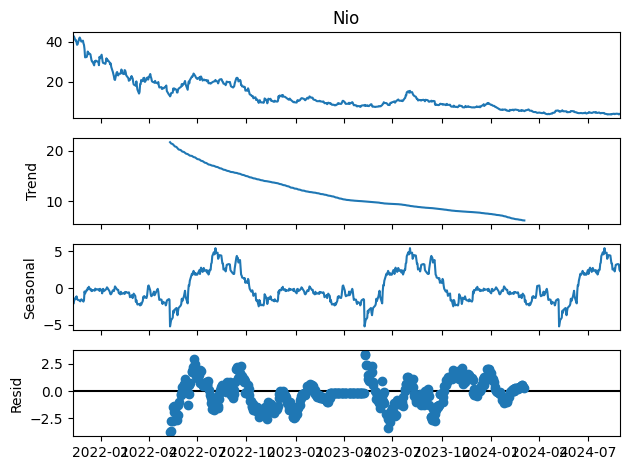

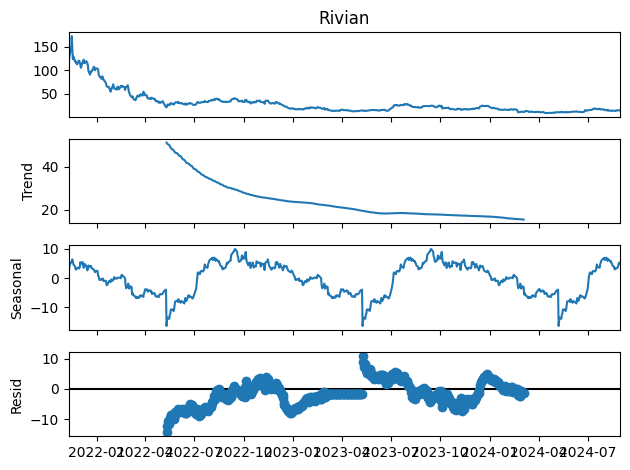

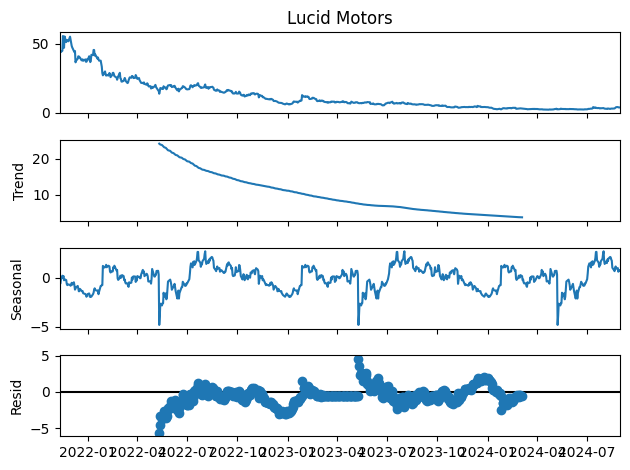

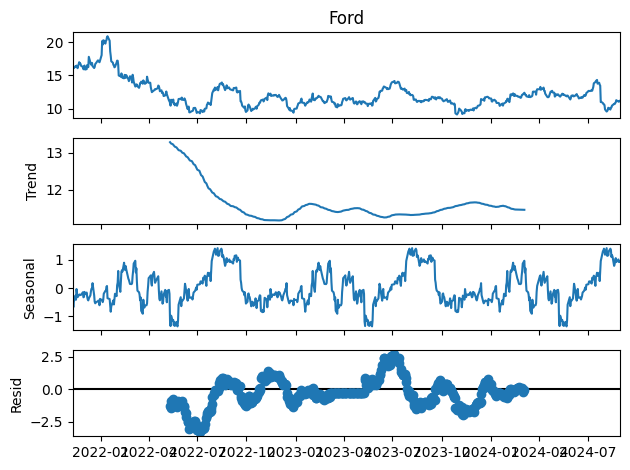

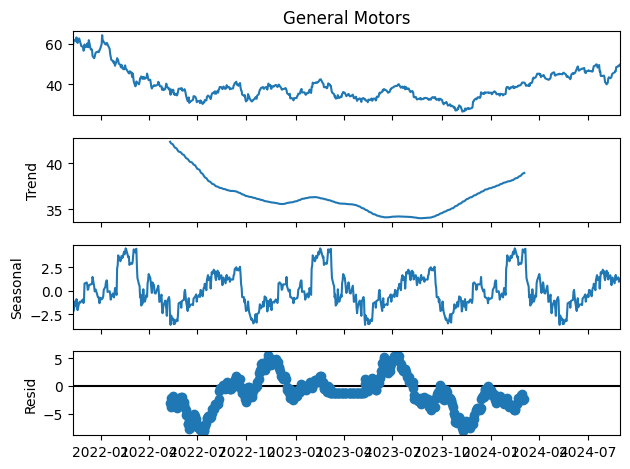

In [159]:
for stock in stocks:
    plot_ts_components(stock)

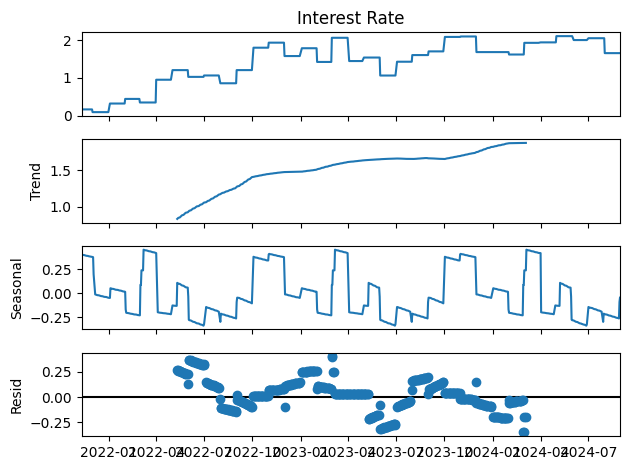

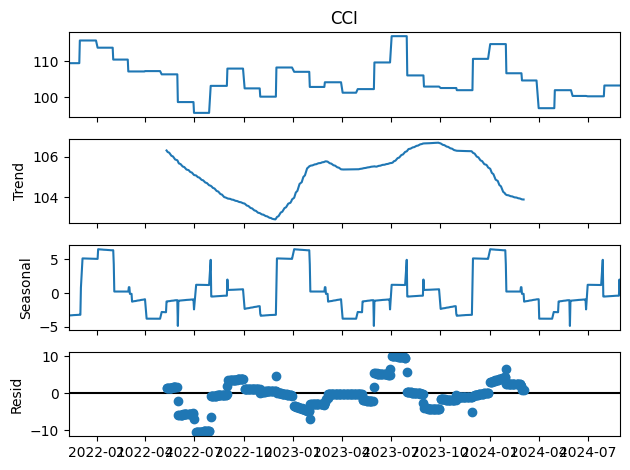

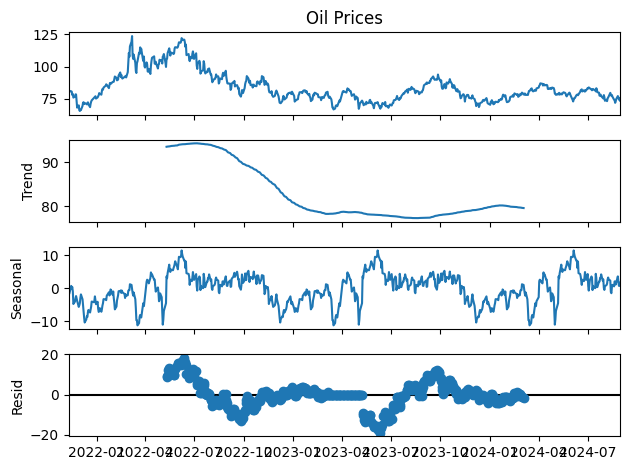

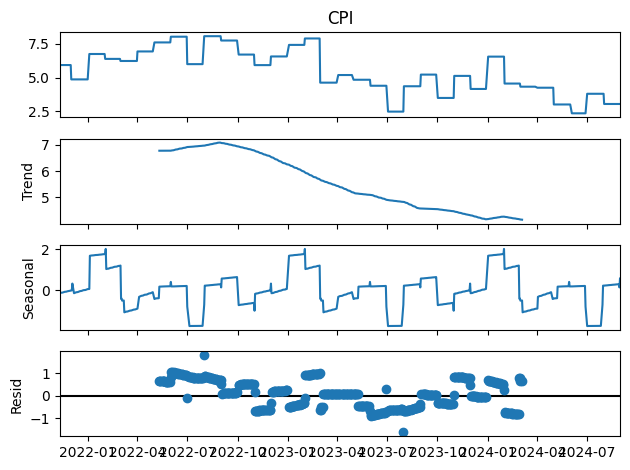

In [160]:
for ind in economic_ind:
    plot_ts_components(ind)

### Check for Stationarity: Augmented Dickey-Fuller Test 

In [161]:
def adf_test(ts):
    result = adfuller(ts)
    print(ts.name)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Conclusion:', 'Reject null hypothesis - Time series is stationary' if result[1] < 0.05 else 'Fail to reject null hypothesis - Time series is non-stationary')
    print("-" * 100)

In [162]:
for stock in stocks:
    adf_test(stock)

Tesla
ADF Statistic: -2.9710149207598815
p-value: 0.03769134077959895
Critical Values: {'1%': -3.4398077121659765, '5%': -2.865713608066101, '10%': -2.5689925469026402}
Conclusion: Reject null hypothesis - Time series is stationary
----------------------------------------------------------------------------------------------------
Nio
ADF Statistic: -3.14920272439644
p-value: 0.023119829824608057
Critical Values: {'1%': -3.439918423003054, '5%': -2.865762386436236, '10%': -2.5690185346241785}
Conclusion: Reject null hypothesis - Time series is stationary
----------------------------------------------------------------------------------------------------
Rivian
ADF Statistic: -5.870231250489173
p-value: 3.253261605054307e-07
Critical Values: {'1%': -3.439918423003054, '5%': -2.865762386436236, '10%': -2.5690185346241785}
Conclusion: Reject null hypothesis - Time series is stationary
----------------------------------------------------------------------------------------------------
Luci

In [163]:
for ind in economic_ind:
    adf_test(ind)

Interest Rate
ADF Statistic: -2.284710281021492
p-value: 0.17694663670226163
Critical Values: {'1%': -3.4396728750301966, '5%': -2.8656541974330936, '10%': -2.5689608949670713}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
----------------------------------------------------------------------------------------------------
CCI
ADF Statistic: -2.8861333003673257
p-value: 0.046984431434322675
Critical Values: {'1%': -3.4396728750301966, '5%': -2.8656541974330936, '10%': -2.5689608949670713}
Conclusion: Reject null hypothesis - Time series is stationary
----------------------------------------------------------------------------------------------------
Oil Prices
ADF Statistic: -2.1477102543615008
p-value: 0.2257675769024558
Critical Values: {'1%': -3.439890503006147, '5%': -2.865750085260771, '10%': -2.569011980884938}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
--------------------------------------------------------------------

### Check for correlation

Pearson Correlation

In [164]:
def corr_pearson(ts):
    correlation = tesla_alligned.corr(ts)
    print(f"Pearson Correlation Coefficient: {correlation}")

In [165]:
for stock in stocks:
    corr_pearson(stock)

Pearson Correlation Coefficient: 1.0
Pearson Correlation Coefficient: 0.7705541831309725
Pearson Correlation Coefficient: 0.7451335448301191
Pearson Correlation Coefficient: 0.7550701196501474
Pearson Correlation Coefficient: 0.6683361725440896
Pearson Correlation Coefficient: 0.44429820194863673


In [166]:
for ind in economic_ind:
    corr_pearson(ind)

Pearson Correlation Coefficient: -0.7538193287726164
Pearson Correlation Coefficient: 0.4533791266639633
Pearson Correlation Coefficient: 0.29439013888901056
Pearson Correlation Coefficient: 0.23805135167273392


Granger Causality

In [167]:
def granger(ts):
    print(ts.name)
    df = pd.DataFrame({'tesla': tesla_alligned, 'ts': ts})

    max_lag = 5
    test_result = grangercausalitytests(df, max_lag)
    print("-" * 100)

In [168]:
for stock in stocks[1:]:
    granger(stock)

Nio

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5442  , p=0.2144  , df_denom=701, df_num=1
ssr based chi2 test:   chi2=1.5508  , p=0.2130  , df=1
likelihood ratio test: chi2=1.5491  , p=0.2133  , df=1
parameter F test:         F=1.5442  , p=0.2144  , df_denom=701, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7248  , p=0.4848  , df_denom=698, df_num=2
ssr based chi2 test:   chi2=1.4600  , p=0.4819  , df=2
likelihood ratio test: chi2=1.4585  , p=0.4823  , df=2
parameter F test:         F=0.7248  , p=0.4848  , df_denom=698, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6040  , p=0.6125  , df_denom=695, df_num=3
ssr based chi2 test:   chi2=1.8304  , p=0.6083  , df=3
likelihood ratio test: chi2=1.8280  , p=0.6089  , df=3
parameter F test:         F=0.6040  , p=0.6125  , df_denom=695, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9642  , p=0.42

In [169]:
for ind in economic_ind:
    granger(ind)

Interest Rate

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1541 , p=0.0015  , df_denom=701, df_num=1
ssr based chi2 test:   chi2=10.1976 , p=0.0014  , df=1
likelihood ratio test: chi2=10.1244 , p=0.0015  , df=1
parameter F test:         F=10.1541 , p=0.0015  , df_denom=701, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9648  , p=0.0072  , df_denom=698, df_num=2
ssr based chi2 test:   chi2=10.0007 , p=0.0067  , df=2
likelihood ratio test: chi2=9.9303  , p=0.0070  , df=2
parameter F test:         F=4.9648  , p=0.0072  , df_denom=698, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6703  , p=0.0121  , df_denom=695, df_num=3
ssr based chi2 test:   chi2=11.1218 , p=0.0111  , df=3
likelihood ratio test: chi2=11.0346 , p=0.0115  , df=3
parameter F test:         F=3.6703  , p=0.0121  , df_denom=695, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9053

Cointegration

In [170]:
def coint_ts(ts):
    if adfuller(ts)[1] <= 0.05:
        diff_ts = ts.diff().dropna()
        tesla_alligned2 = tesla_alligned[1:]
        score, p_value, _ = coint(tesla_alligned2, diff_ts)
        print(f"Cointegration Test p-value for {ts.name} (diff): {p_value}")
    else:
        score, p_value, _ = coint(tesla_alligned, ts)
        print(f"Cointegration Test p-value for {ts.name}: {p_value}")

In [171]:
for stock in stocks[1:]:
    coint_ts(stock)

Cointegration Test p-value for Nio (diff): 0.16065451014527704
Cointegration Test p-value for Rivian (diff): 0.15933888264892587
Cointegration Test p-value for Lucid Motors (diff): 0.15907871511916155
Cointegration Test p-value for Ford: 0.23749137663993847
Cointegration Test p-value for General Motors: 0.3832476493177417


In [172]:
for ind in economic_ind[1:]:
    coint_ts(ind)

Cointegration Test p-value for CCI (diff): 0.14988817139578525
Cointegration Test p-value for Oil Prices: 0.03889129255797001
Cointegration Test p-value for CPI: 0.08642593166455875


### Plot ACF and PACF

In [173]:
def plot_acf_pacf(ts):

    if adfuller(ts)[1] <= 0.05:
        ts = ts.diff().dropna()
        ts.name = f"{ts.name} (Diff)"

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    plot_acf(ts, ax=axes[0], lags=40)
    axes[0].set_title('Autocorrelation Function (ACF)')

    plot_pacf(ts, ax=axes[1], lags=40)
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    fig.suptitle(f"{ts.name} ACF and PACF")
    plt.tight_layout()
    plt.show()

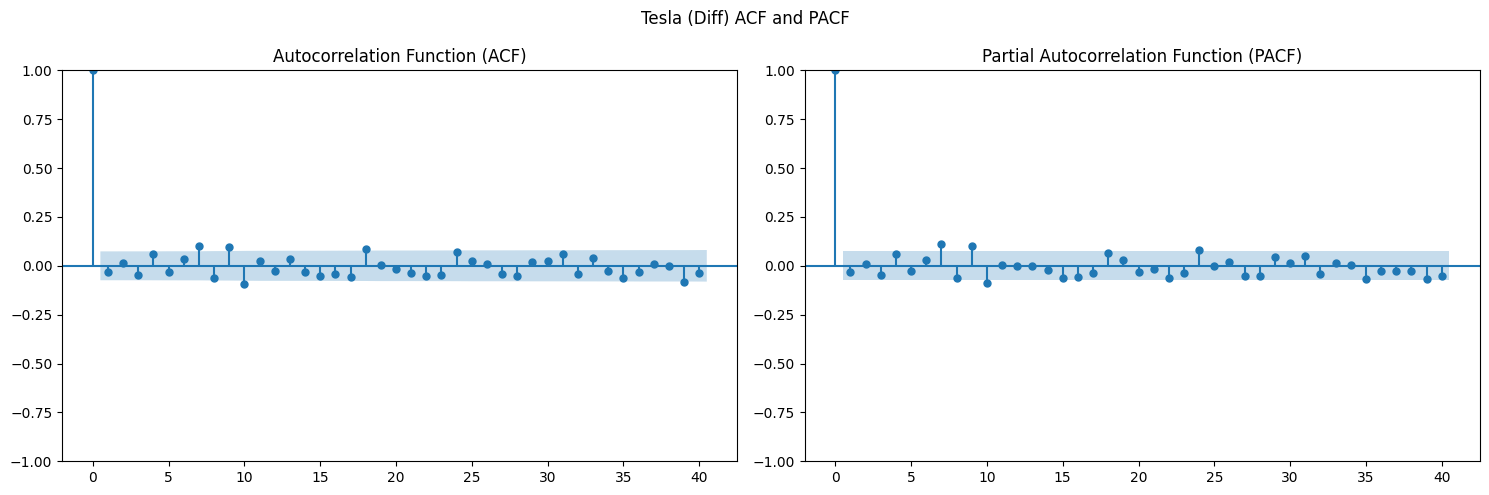

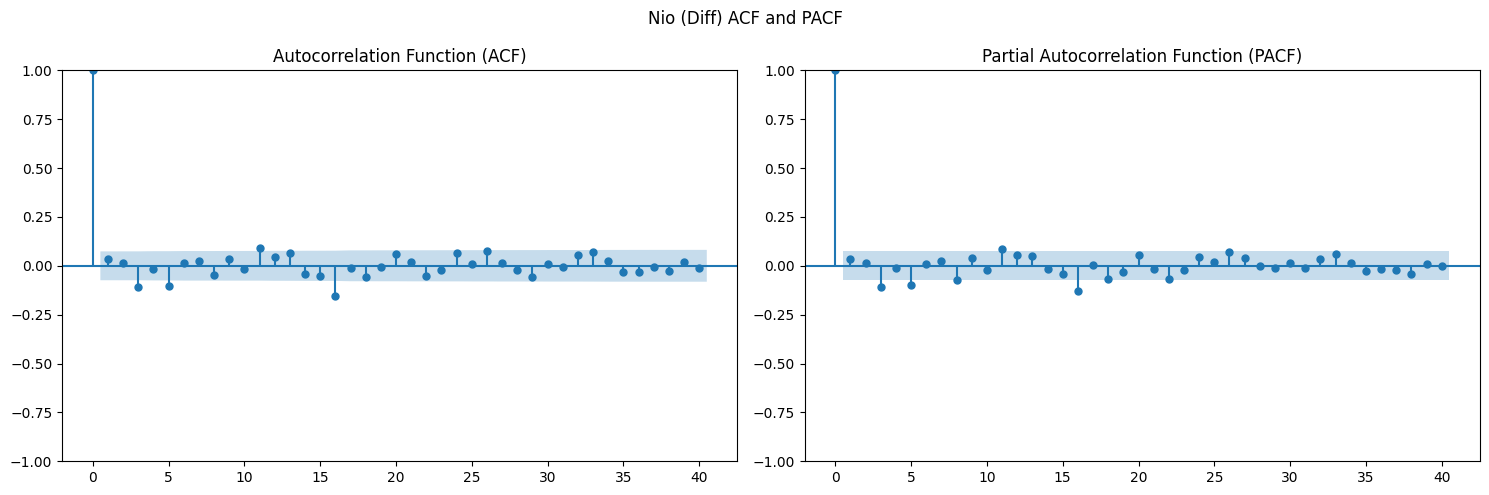

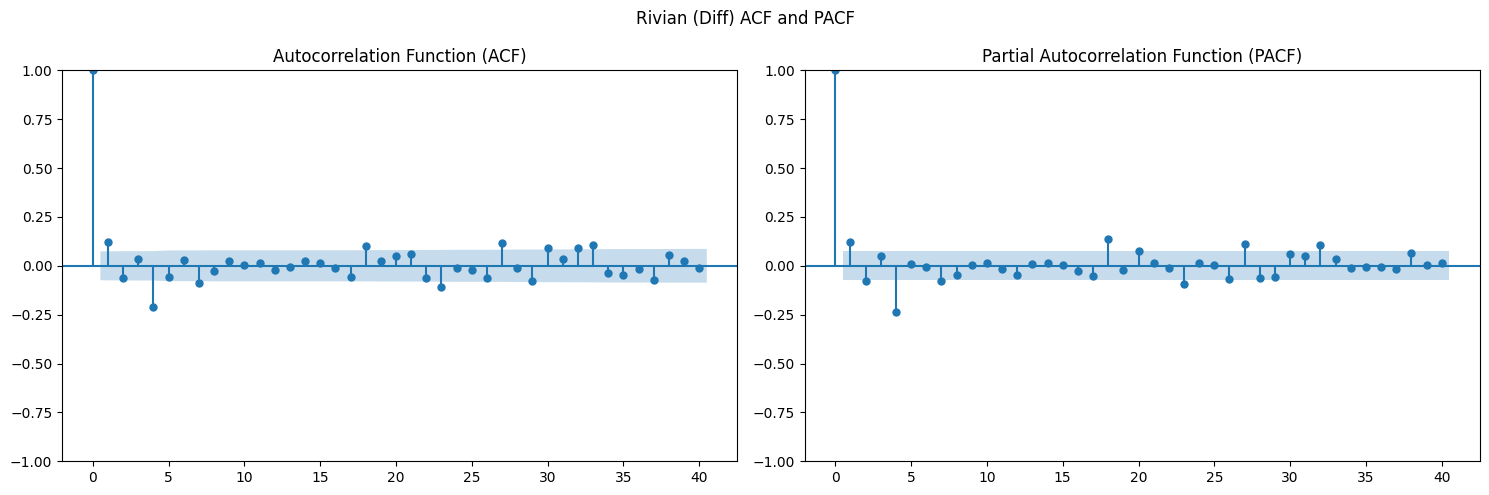

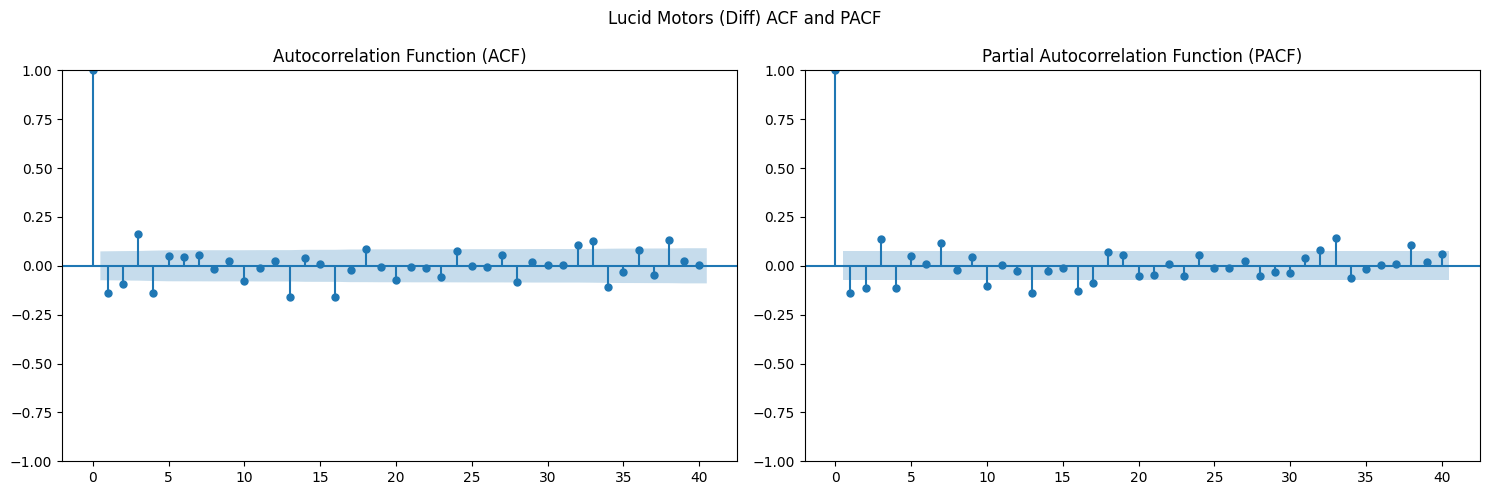

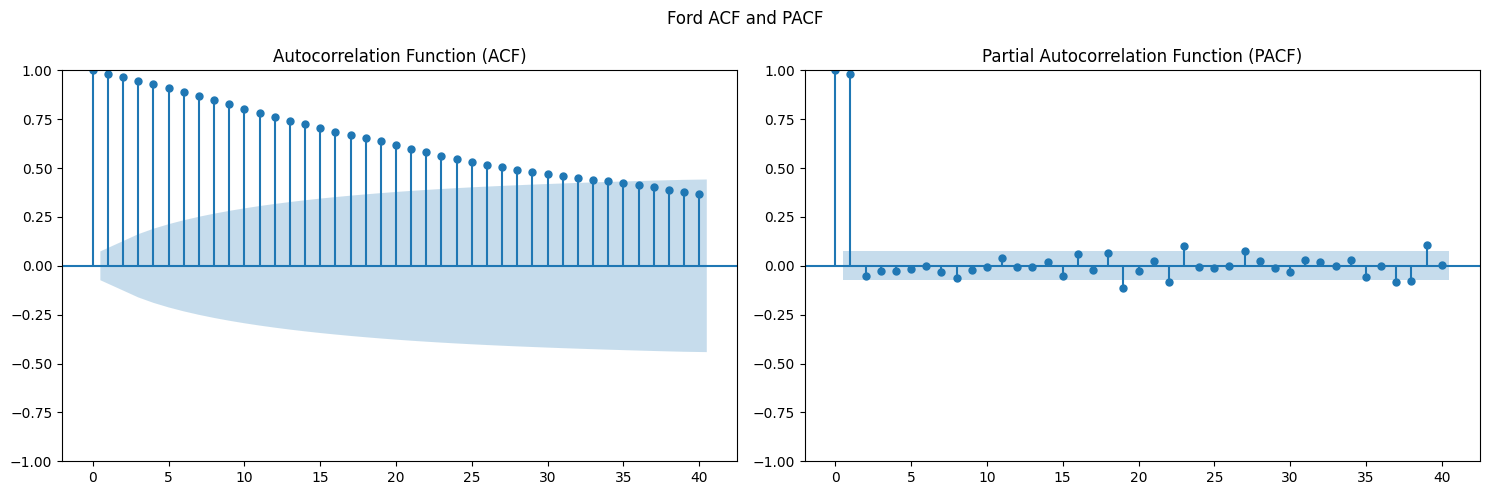

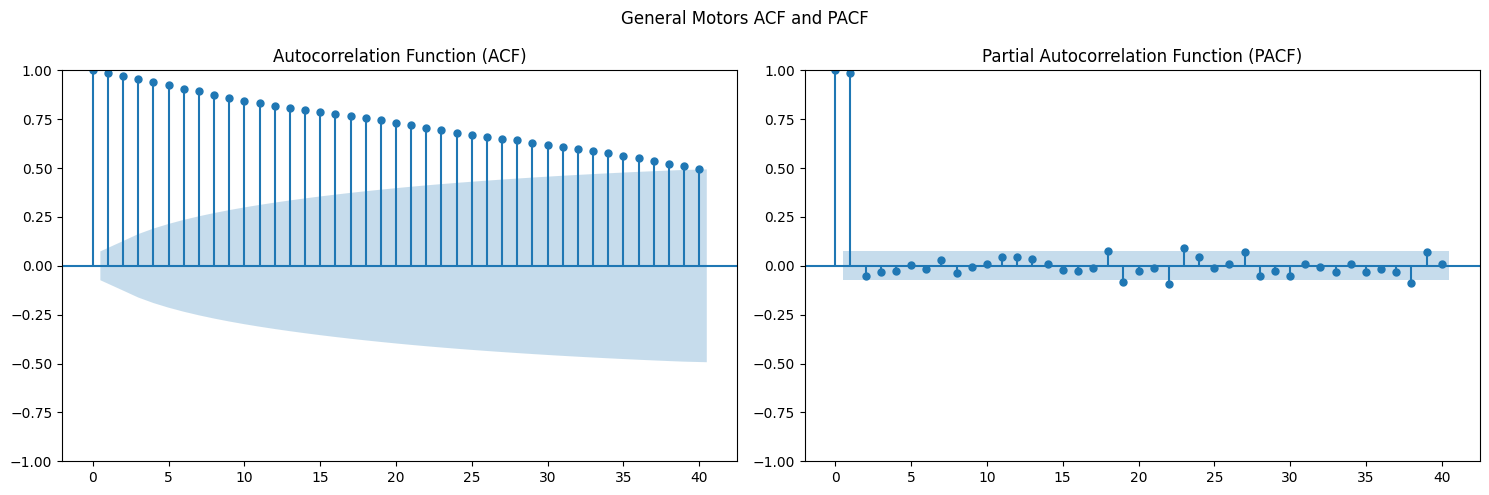

In [174]:
for stock in stocks:
    plot_acf_pacf(stock)

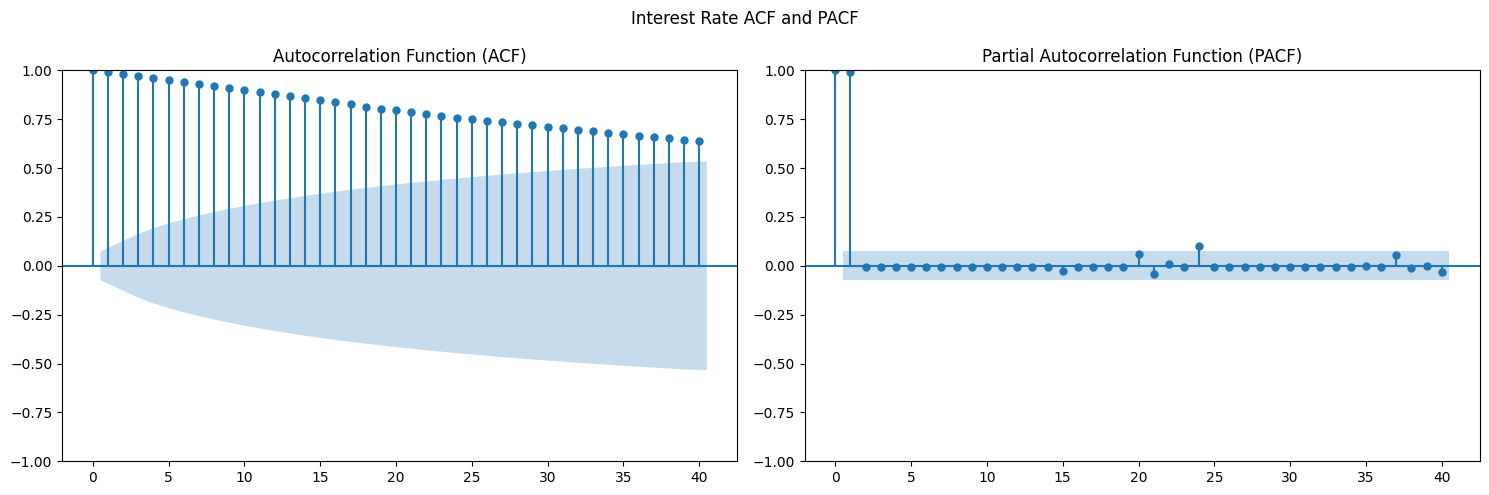

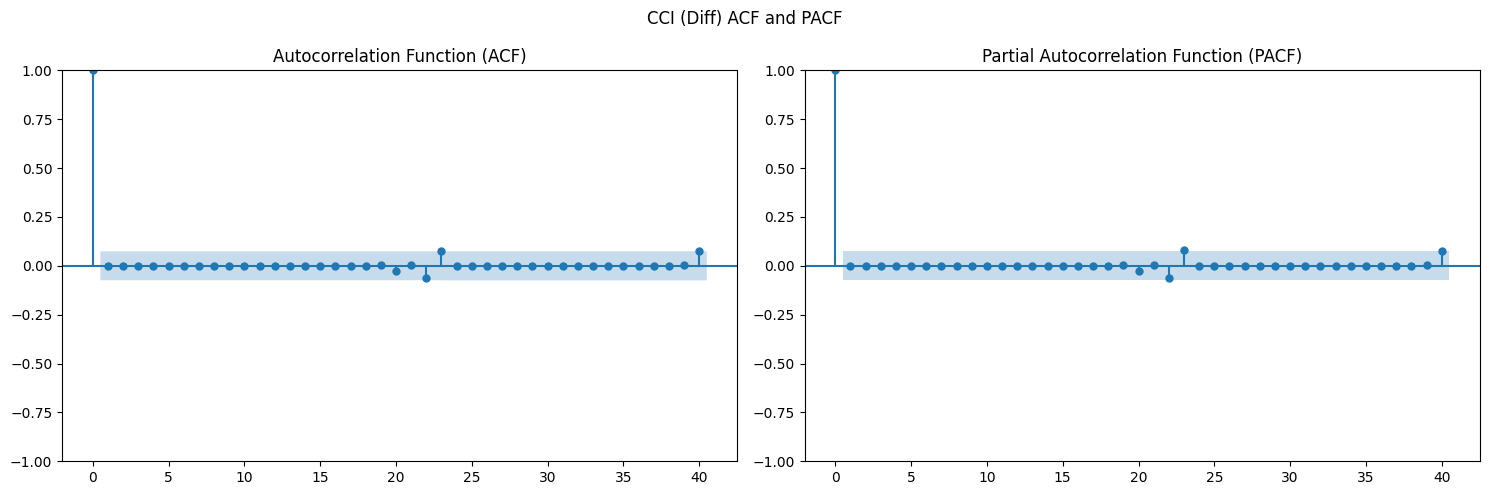

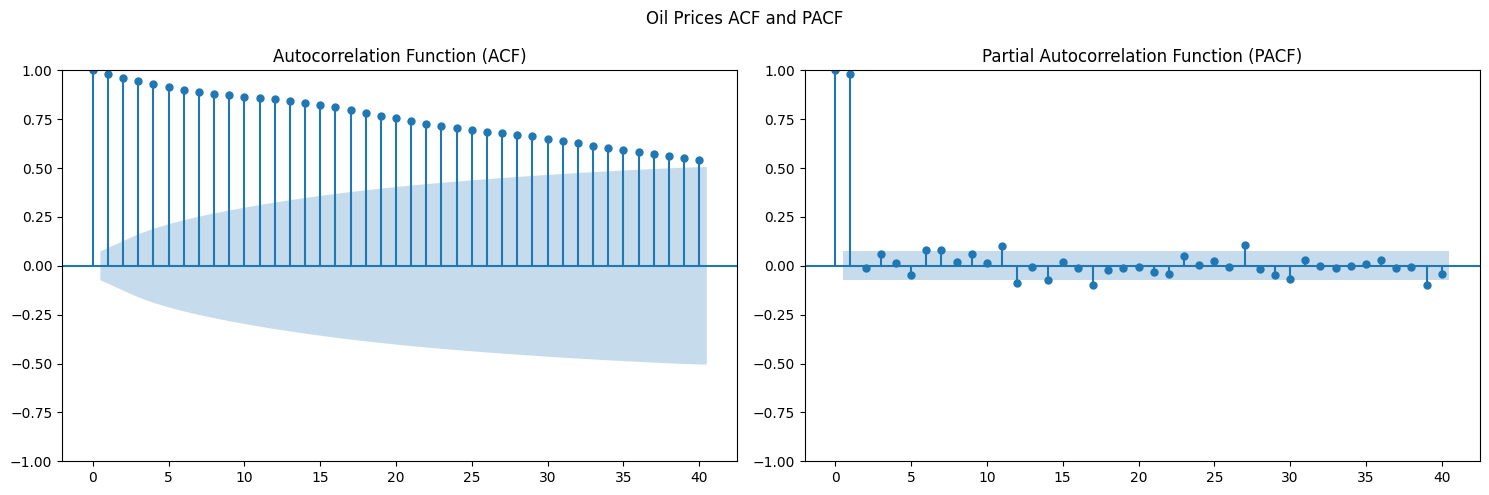

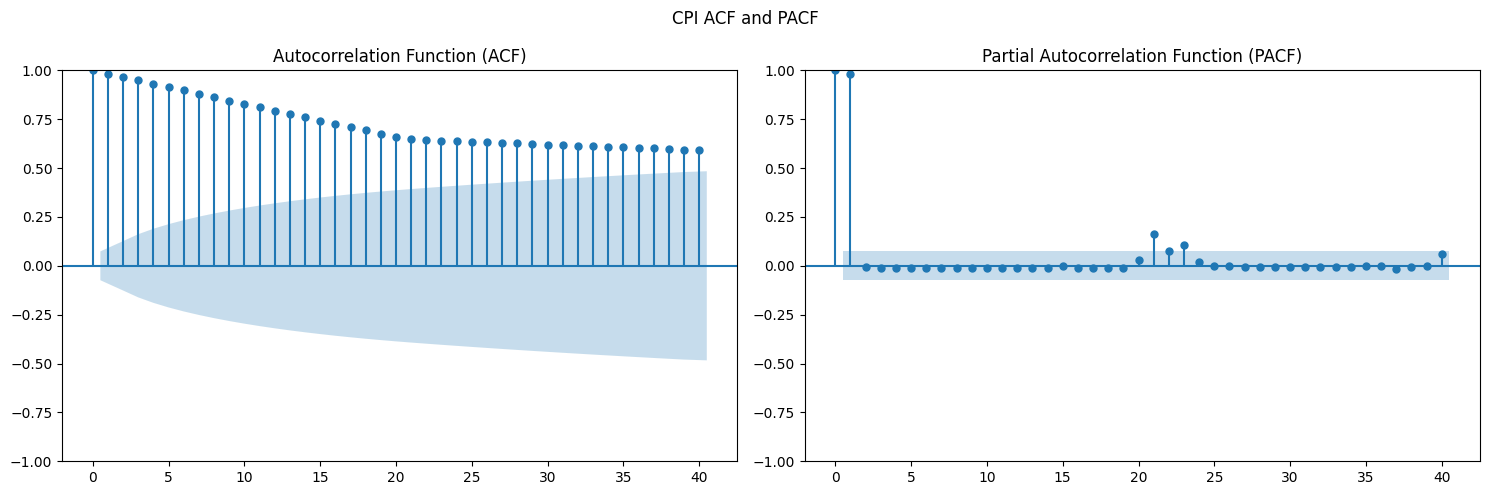

In [175]:
for ind in economic_ind:
    plot_acf_pacf(ind)

## Save Data

In [176]:
data = pd.DataFrame(stocks).T.join(pd.DataFrame(economic_ind).T)
data.head()

,Tesla,Nio,Rivian,Lucid Motors,Ford,General Motors,Interest Rate,CCI,Oil Prices,CPI
2021-11-10,355.983337,39.549999,100.730003,40.750000,15.992260,57.907940,0.163998,109.5,81.340,5.921978
2021-11-11,354.503326,42.200001,122.989998,44.980000,16.149208,60.399345,0.163998,109.5,81.590,5.921978
2021-11-12,344.473328,42.669998,129.949997,43.930000,16.107906,61.943035,0.163998,109.5,80.790,5.921978
2021-11-15,337.796661,40.570000,149.360001,44.880001,16.405281,61.522923,0.163998,109.5,80.880,5.921978
2021-11-16,351.576660,40.669998,172.009995,55.520000,16.347460,61.171192,0.163998,109.5,80.556,5.921978


In [177]:
data.tail()

,Tesla,Nio,Rivian,Lucid Motors,Ford,General Motors,Interest Rate,CCI,Oil Prices,CPI
2024-08-26,213.210007,4.03,14.36,4.26,11.11,48.628506,1.653358,103.3,77.15,3.052838
2024-08-27,209.210007,4.00,14.48,4.11,11.14,49.127258,1.653358,103.3,75.73,3.052838
2024-08-28,205.750000,3.70,13.83,3.94,11.04,48.927757,1.653358,103.3,74.38,3.052838
2024-08-29,206.279999,3.94,14.09,3.96,11.11,49.346714,1.653358,103.3,75.76,3.052838
2024-08-30,214.110001,4.04,14.13,4.02,11.19,49.655937,1.653358,103.3,73.65,3.052838


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 705 entries, 2021-11-10 to 2024-08-30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tesla           705 non-null    float64
 1   Nio             705 non-null    float64
 2   Rivian          705 non-null    float64
 3   Lucid Motors    705 non-null    float64
 4   Ford            705 non-null    float64
 5   General Motors  705 non-null    float64
 6   Interest Rate   705 non-null    float64
 7   CCI             705 non-null    float64
 8   Oil Prices      705 non-null    float64
 9   CPI             705 non-null    float64
dtypes: float64(10)
memory usage: 76.8 KB


In [179]:
data.to_csv("../data/process/data.csv")